### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.offline as po
import plotly.graph_objs as gon
%matplotlib inline
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate,GridSearchCV

# Machine Learning classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn import metrics

In [2]:
## Loading and Inspecting dataset
df = pd.read_csv('Tel_Customer_Churn_Dataset.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [3]:
def df_info(dataframe, head=5):
    print("------------------- Shape -------------------")
    print(dataframe.shape)
    print("------------------- Types -------------------")
    print(dataframe.dtypes)
    print("------------------- Head --------------------")
    print(dataframe.head(head))
    print("------------------- Tail --------------------")
    print(dataframe.tail(head))
    print("------------------- NA ----------------------")
    print(dataframe.isnull().sum())
    print("------------------- Quantiles -------------------")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

df_info(df)

------------------- Shape -------------------
(7032, 21)
------------------- Types -------------------
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
------------------- Head --------------------
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-Q

C:\Users\DAVID\AppData\Local\Temp\ipykernel_748\2943866790.py:13: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Checking for Missing Values

In [6]:
null_ = round(df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100,2).reset_index().rename(columns={'index':'column_name', 0:'percent_missing'})
null_.head(2)

,column_name,percent_missing
0,customerID,0.0
1,DeviceProtection,0.0


### Data Manipulation

In [7]:
df1=df.drop(['customerID'], axis = 1)

In [8]:
df1["Churn"] = df1["Churn"].map({'Yes' : 1, 'No' : 0})

In [9]:
### Replace all the spaces with null values
df1['TotalCharges'] = df1["TotalCharges"].replace(" ",np.nan)

# Drop null values of 'Total Charges' feature
df1 = df1[df1["TotalCharges"].notnull()]
df1 = df1.reset_index()[df1.columns]

# # Convert 'Total Charges' column values to float data type
df1["TotalCharges"] = df1["TotalCharges"].astype(float)

In [10]:
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


### Inspecting Categorical and Numerical Varaible in the dataset 


In [13]:
#Analyzing CATEGORICAL AND NUMERICAL CCOLUMNS 

def grab_col_names(dataframe,cat_th=10,car_th=20):
    # cat_cols
    cat_feat = [col for col in df1.columns if df1[col].dtypes == "O"]
    num_but_cat = [col for col in df1.columns if df1[col].nunique() < cat_th and df1[col].dtypes != "O"]
    cat_but_char = [col for col in df1.columns if df1[col].nunique() > car_th and df1[col].dtypes == "O"]
    cat_feat = cat_feat + num_but_cat
    cat_feat = [col for col in cat_feat if col not in cat_but_char]
    
    # num_cols
    num_feat = [col for col in df1.columns if df1[col].dtypes != "O"]
    num_feat = [col for col in num_feat if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_feat: {len(cat_feat)}')
    print(f'num_feat: {len(num_feat)}')
    print(f'cat_but_char: {len(cat_but_char)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_feat, num_feat,cat_but_char

cat_feat, num_feat,num_but_char=grab_col_names(df1)

Observations: 7032
Variables: 20
cat_feat: 17
num_feat: 3
cat_but_char: 0
num_but_cat: 2


In [14]:
df1[cat_feat].columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Churn'],
      dtype='object')

In [15]:
df1[num_feat].columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

#### Summary of Categorical Variable

In [16]:
def cat_summary(dataframe, col_name, target, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("__"*40)
    if plot:
        sns.countplot(x=dataframe[col_name], hue=target, data=dataframe)
        plt.show()


for col in cat_feat:
    cat_summary(df1, col,'Churn')

        gender      Ratio
Male      3549  50.469283
Female    3483  49.530717
________________________________________________________________________________
     Partner      Ratio
No      3639  51.749147
Yes     3393  48.250853
________________________________________________________________________________
     Dependents      Ratio
No         4933  70.150739
Yes        2099  29.849261
________________________________________________________________________________
     PhoneService     Ratio
Yes          6352  90.32992
No            680   9.67008
________________________________________________________________________________
                  MultipleLines      Ratio
No                         3385  48.137088
Yes                        2967  42.192833
No phone service            680   9.670080
________________________________________________________________________________
             InternetService      Ratio
Fiber optic             3096  44.027304
DSL                     2416

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


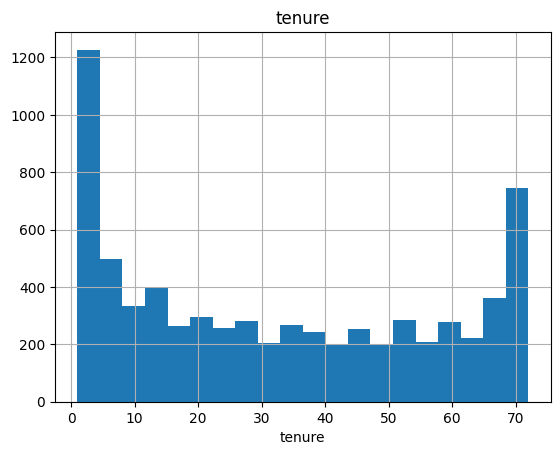

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64


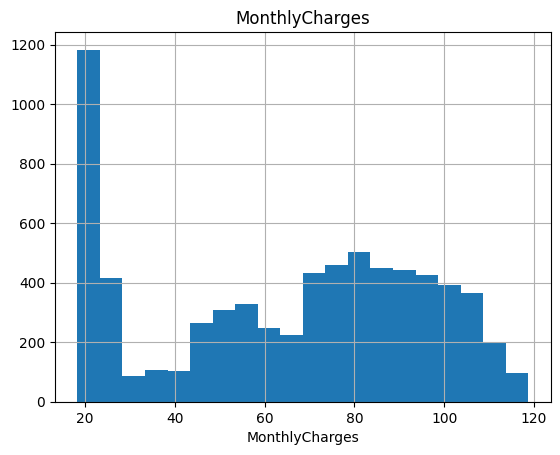

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


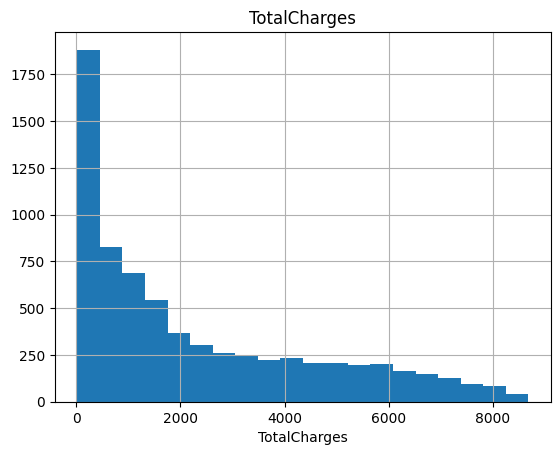

In [17]:
def num_summary(dataframe, numerical_col, plot=False):
    print(dataframe[numerical_col].describe())

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()


for col in num_feat:
    num_summary(df, col, True)

### Analysis of Numerical Variables by Target Variable

In [18]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in num_feat:
    target_summary_with_num(df1, "Churn", col)

          tenure
Churn           
0      37.650010
1      17.979133


       MonthlyCharges
Churn                
0           61.307408
1           74.441332


       TotalCharges
Churn              
0       2555.344141
1       1531.796094




### Analysis of Categorical Variables by Target Variables

In [19]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")


for col in cat_feat:
    target_summary_with_cat(df1, "Churn", col)

gender
        TARGET_MEAN  Count      Ratio
Female     0.269595   3483  49.530717
Male       0.262046   3549  50.469283


Partner
     TARGET_MEAN  Count      Ratio
No      0.329761   3639  51.749147
Yes     0.197171   3393  48.250853


Dependents
     TARGET_MEAN  Count      Ratio
No      0.312791   4933  70.150739
Yes     0.155312   2099  29.849261


PhoneService
     TARGET_MEAN  Count     Ratio
No      0.250000    680   9.67008
Yes     0.267475   6352  90.32992


MultipleLines
                  TARGET_MEAN  Count      Ratio
No                   0.250812   3385  48.137088
No phone service     0.250000    680   9.670080
Yes                  0.286485   2967  42.192833


InternetService
             TARGET_MEAN  Count      Ratio
DSL             0.189983   2416  34.357224
Fiber optic     0.418928   3096  44.027304
No              0.074342   1520  21.615472


OnlineSecurity
                     TARGET_MEAN  Count      Ratio
No                      0.417787   3497  49.729807
No internet 

### Categorical Variable Analysis


## Investigating Outliers

In [20]:
df1[num_feat].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


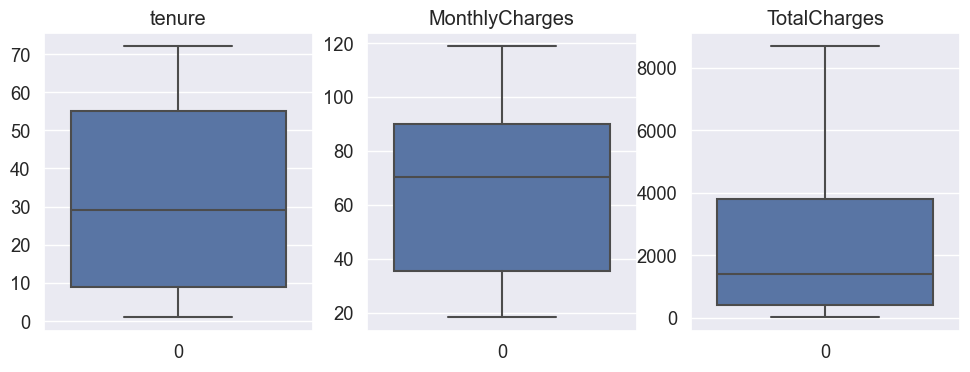

In [21]:
#Investigating outliers with a boxplot
n = 1

sns.set_style('whitegrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (16, 16))

for col in num_feat:
    plt.subplot(5,4,n)
    sns.boxplot(df1[col]).set(xlabel =None)
    sns.color_palette("muted", 9)
    plt.title(col)
    plt.subplots_adjust(bottom=-0.2)
    n = n + 1

There are no outliers in the dataset, no values extreme from the rest of the data points. 

In [22]:
#Further reconfirming no outliers using IQR method
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
for col in num_feat:
    print(col, check_outlier(df1, col))

tenure False
MonthlyCharges False
TotalCharges False


## Correlation

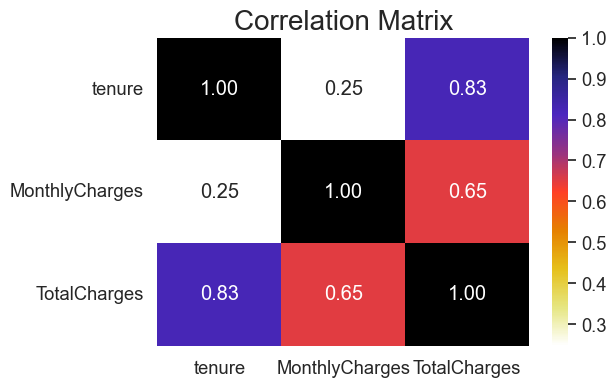

In [23]:
# Correlation Matrix
f, ax = plt.subplots(figsize=[6, 4])
sns.heatmap(df1[num_feat].corr(), annot=True, fmt=".2f", ax=ax, cmap="CMRmap_r")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# EDA and Visualization

In [24]:
not_churn = df1[df1['Churn'] == 0]
churn_data =df1[df1['Churn'] == 1]

In [25]:
churn_labels = df1["Churn"].value_counts().keys().tolist()
churn_values = df1["Churn"].value_counts(normalize=True)

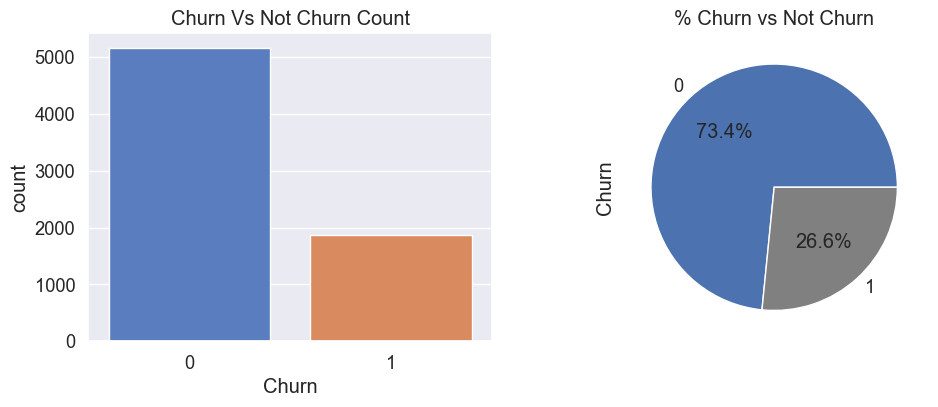

In [26]:
# Plotting Meal Prefered Count and Percentage 
plt.figure(figsize = (5, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Churn', data=df1, palette='muted')
plt.title('Churn Vs Not Churn Count')
#plt.xticks(rotation=60)

plt.subplot(1, 2, 2)
(df1['Churn']).value_counts().plot.pie(colors=['b', 'grey'], labels=churn_labels, 
title = '% Churn vs Not Churn', autopct='%1.1f%%')
plt.subplots_adjust(right=1.9)
plt.show()

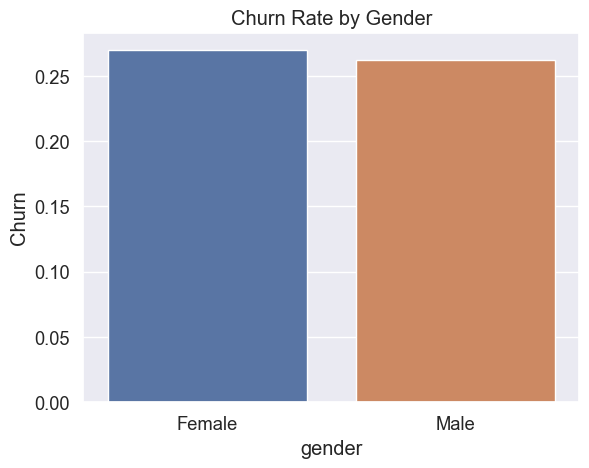

In [27]:
##  Visualizing Churn Rate based on Gender

churn_by_gender=df1.groupby('gender').Churn.mean().reset_index()
plt.title('Churn Rate by Gender')
sns.barplot(x=churn_by_gender["gender"],y=churn_by_gender['Churn'],data=churn_by_gender)
plt.show()

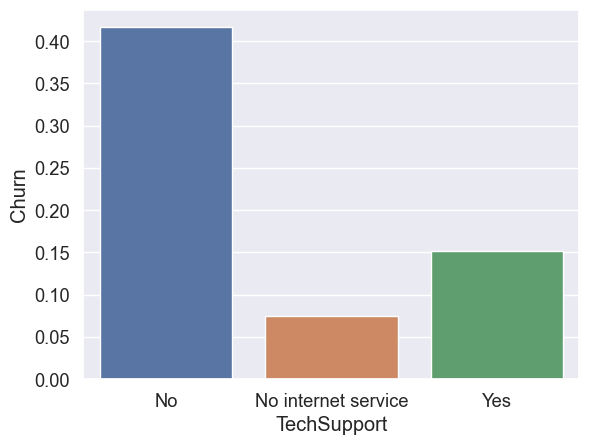

In [28]:
##  Visualizing Churn Rate based on TechSupport

churn_by_tsupport=df1.groupby('TechSupport').Churn.mean().reset_index()
sns.barplot(x=churn_by_tsupport["TechSupport"], y=churn_by_tsupport['Churn'],data=churn_by_gender)
plt.show()

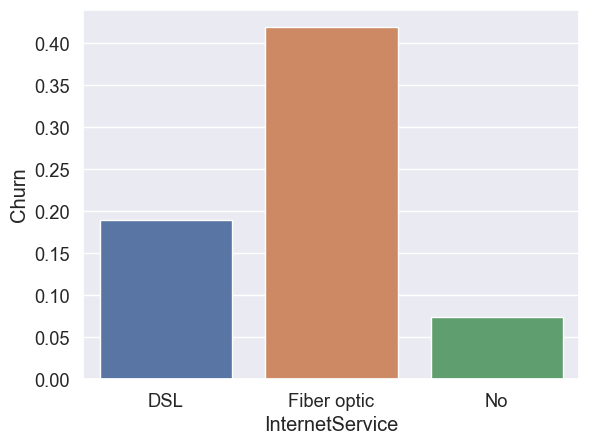

In [29]:
## Visualizing Churn Rate based on InternetService

churn_by_intservce=df1.groupby('InternetService').Churn.mean().reset_index()
sns.barplot(x=churn_by_intservce["InternetService"], y=churn_by_intservce['Churn'],data=churn_by_intservce)
plt.show()

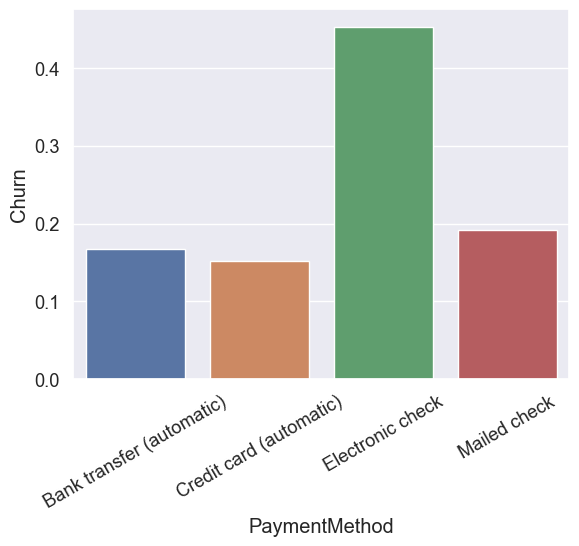

In [30]:
## Plotting Churn Rate by PaymentMethod

churn_by_pmethod=df1.groupby('PaymentMethod').Churn.mean().reset_index()
sns.barplot(x=churn_by_pmethod["PaymentMethod"], y=churn_by_pmethod['Churn'],data=churn_by_pmethod)
plt.xticks(rotation =30)
plt.show()

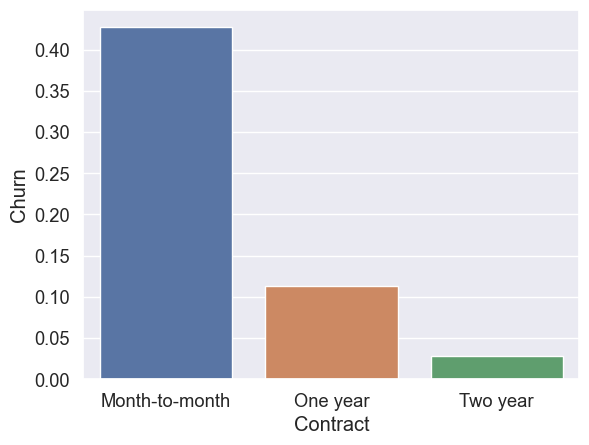

In [31]:
## Plotting Churn Rate by PaymentMethod

churn_by_ctract=df1.groupby('Contract').Churn.mean().reset_index()
sns.barplot(x=churn_by_ctract["Contract"], y=churn_by_ctract['Churn'],data=churn_by_ctract)
plt.show()

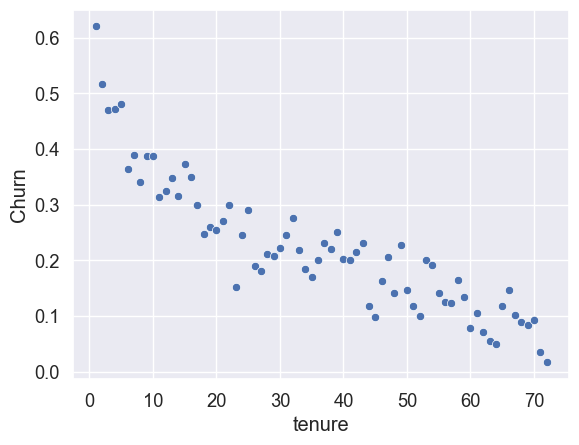

In [32]:
## Plotting Churn Rate by PaymentMethod

churn_by_tenure=df1.groupby('tenure').Churn.mean().reset_index()
sns.scatterplot(x=churn_by_tenure["tenure"], y=churn_by_tenure['Churn'],data=churn_by_tenure)
plt.show()

<Figure size 5500x700 with 0 Axes>

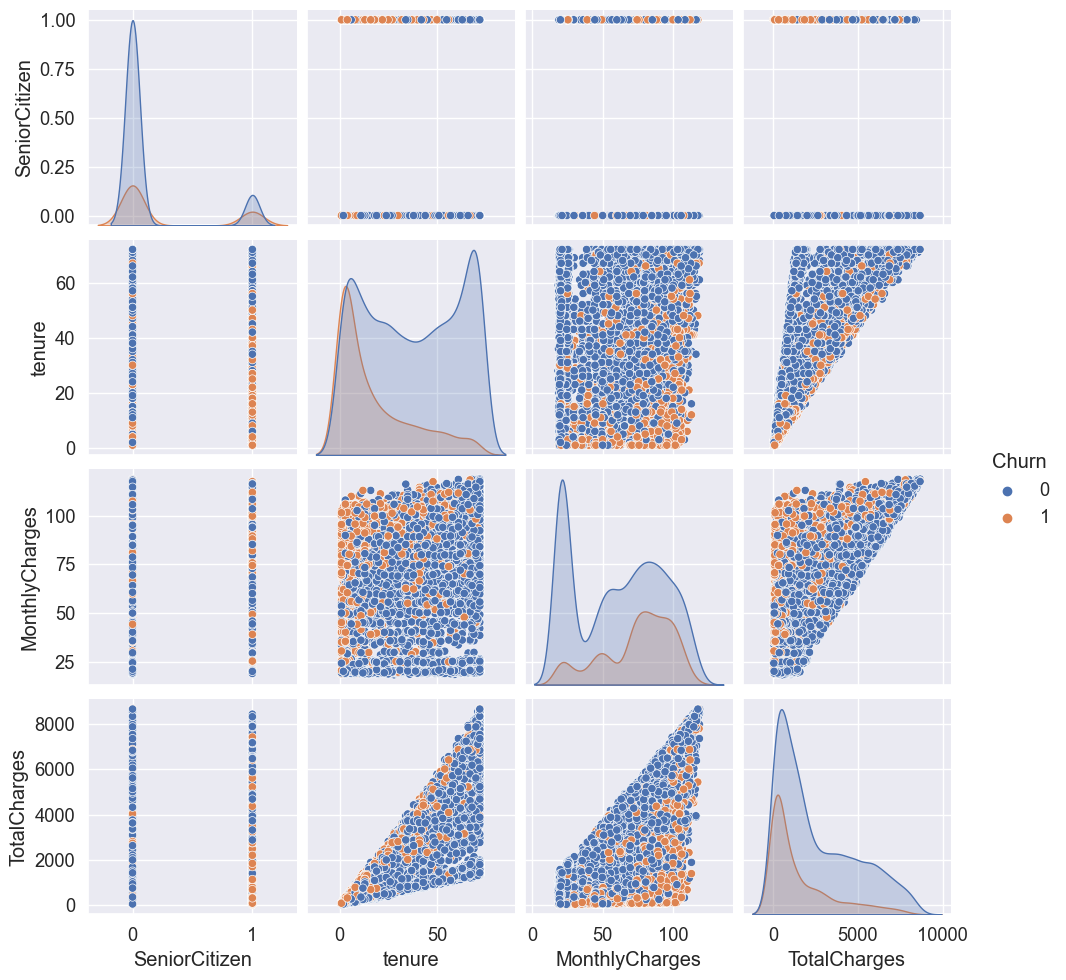

In [33]:
plt.figure(figsize=(55,7))
sns.pairplot(data=df1,kind='scatter',hue='Churn')
plt.show()

## Encoding


In [34]:
cat_feat,num_feat,cat_but_char=grab_col_names(df1)

Observations: 7032
Variables: 20
cat_feat: 17
num_feat: 3
cat_but_char: 0
num_but_cat: 2


In [35]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

cat_feat = [col for col in cat_feat if col not in binary_cols and col not in ["Churn"]]

for col in binary_cols:
    df1 = label_encoder(df1, col)

In [36]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7028,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7029,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7030,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [37]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


df1 = one_hot_encoder(df1, cat_feat, drop_first=True)

In [38]:
df1

,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,0,1,0,1,0,1,29.85,29.85,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,34,1,0,56.95,1889.50,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,2,1,1,53.85,108.15,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,45,0,0,42.30,1840.75,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,1,1,24,1,1,84.80,1990.50,0,0,...,0,1,0,1,1,0,0,0,1,0
7028,0,1,1,72,1,1,103.20,7362.90,0,0,...,0,1,0,1,1,0,1,0,0,0
7029,0,1,1,11,0,1,29.60,346.45,0,1,...,0,0,0,0,0,0,0,1,0,0
7030,1,1,0,4,1,1,74.40,306.60,1,0,...,0,0,0,0,0,0,0,0,1,1


In [39]:
df1.shape

(7032, 31)

## Modelling

In [40]:
## Standardizing the numerical features 
X_scaled = StandardScaler().fit_transform(df1[num_feat])
df1[num_feat] = pd.DataFrame(X_scaled, columns=df1[num_feat].columns)

In [41]:
import pickle
pickle.dump(X_scaled,open('telcom_scaler.pkl','wb'))

In [42]:
y = df1["Churn"]
X = df1.drop(["Churn"], axis=1)

In [43]:
#Function to iterate through a dictionary of models, fit each model, make predictions, and print accuracy scores.
    
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("DT", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier())
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

In [44]:
base_models(X,y)

Base Models....
roc_auc: 0.8445 (LR) 
roc_auc: 0.7755 (KNN) 
roc_auc: 0.7971 (SVC) 
roc_auc: 0.6605 (DT) 
roc_auc: 0.8243 (RF) 


Top performing LogisticRegression (LR) and RandomForestClassifier (RF)  models.

<a id = "14"></a><br>
## Hyperparameter Optimization
Let's examine the predefined hyperparameter values of the models.

In [45]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [46]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [47]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [48]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [49]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

fine tuning hyperparameters for some models

In [50]:
log_params = {'random_state': [42], 
              'fit_intercept': [True], 
              'n_jobs': [2]}

knn_params = {"n_neighbors": range(2, 10)}

svc_params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

df_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 20)}

rf_params = {"max_depth": [8, 15, None],
             "max_features":['sqrt'],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

classifiers = [
    ('LOG', LogisticRegression(), log_params),
    ('KNN', KNeighborsClassifier(), knn_params),
    ("SVC", SVC(), svc_params),
    ("DT", DecisionTreeClassifier(), df_params),
    ("RF", RandomForestClassifier(), rf_params)
]


In [51]:
def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [52]:
best_models = hyperparameter_optimization(X, y)

Hyperparameter Optimization....
########## LOG ##########
roc_auc (Before): 0.8445
roc_auc (After): 0.8445
LOG best params: {'fit_intercept': True, 'n_jobs': 2, 'random_state': 42}

########## KNN ##########
roc_auc (Before): 0.7755
roc_auc (After): 0.7988
KNN best params: {'n_neighbors': 8}

########## SVC ##########
roc_auc (Before): 0.7971
roc_auc (After): 0.7971
SVC best params: {'kernel': 'rbf'}

########## DT ##########
roc_auc (Before): 0.6594
roc_auc (After): 0.8174
DT best params: {'max_depth': 7, 'min_samples_split': 19}

########## RF ##########
roc_auc (Before): 0.823
roc_auc (After): 0.8421
RF best params: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 15, 'n_estimators': 200}



<a id = "15"></a><br>
## Stacking & Ensemble Learning

In [53]:
def voting_classifier(best_models, X, y):
    print("Voting Classifier...")
    voting_clf = VotingClassifier(estimators=[('KNN', best_models["KNN"]), ('DT', best_models["DT"]),
                                              ('RF', best_models["RF"])],
                                  voting='soft').fit(X, y)
    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf

In [54]:
voting_clf = voting_classifier(best_models, X, y)

Voting Classifier...
Accuracy: 0.7994880546075085
F1Score: 0.583732910791079
ROC_AUC: 0.8358097451647714


## Feature Importance
Feature importance for two best models

In [55]:
model_LOG = LogisticRegression(fit_intercept=True,random_state=42,n_jobs=2).fit(X, y)

In [69]:
model_RF = RandomForestClassifier(max_depth = 15, min_samples_split = 15).fit(X, y)

#### Logistics Regression Feature Importance using magnitude of coefficients assigned to each feature


In [65]:
## LogisticRegression model doesn't have feature_importances_ attribute, hence, we assess feature importance by the magnitudes of the 
## coefficients assigned to each feature.
coefficients = model_LOG.coef_
feature_importances_ = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients.flatten()})
feature_importances_

,Feature,Coefficient
0,gender,-0.022908
1,Partner,0.000067
2,Dependents,-0.150461
3,tenure,-1.436120
4,PhoneService,-0.222103
5,PaperlessBilling,0.343563
6,MonthlyCharges,-0.236212
7,TotalCharges,0.688214
8,MultipleLines_No phone service,0.238772
9,MultipleLines_Yes,0.287733


<Axes: ylabel='Feature'>

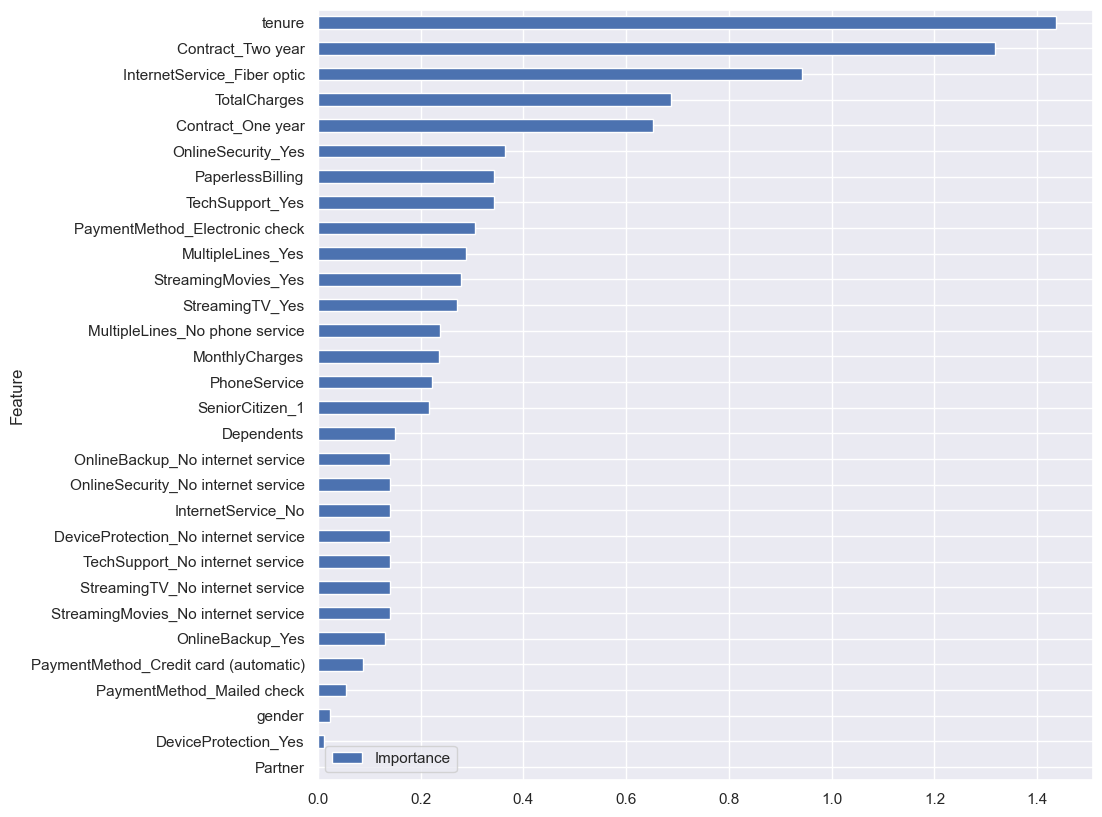

In [82]:
coefficients = model_LOG.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 10))

In [70]:
model_RF.feature_importances_

array([0.01332322, 0.01336329, 0.01435717, 0.19591697, 0.00403524,
       0.02021527, 0.12784165, 0.1712051 , 0.00372845, 0.01638686,
       0.06708023, 0.0086298 , 0.01172596, 0.02541614, 0.01061657,
       0.01560765, 0.00941177, 0.01124292, 0.01093289, 0.0308195 ,
       0.00629372, 0.01302656, 0.00911884, 0.01333344, 0.03322835,
       0.05254134, 0.00971176, 0.05522922, 0.00925861, 0.0164015 ])

In [71]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

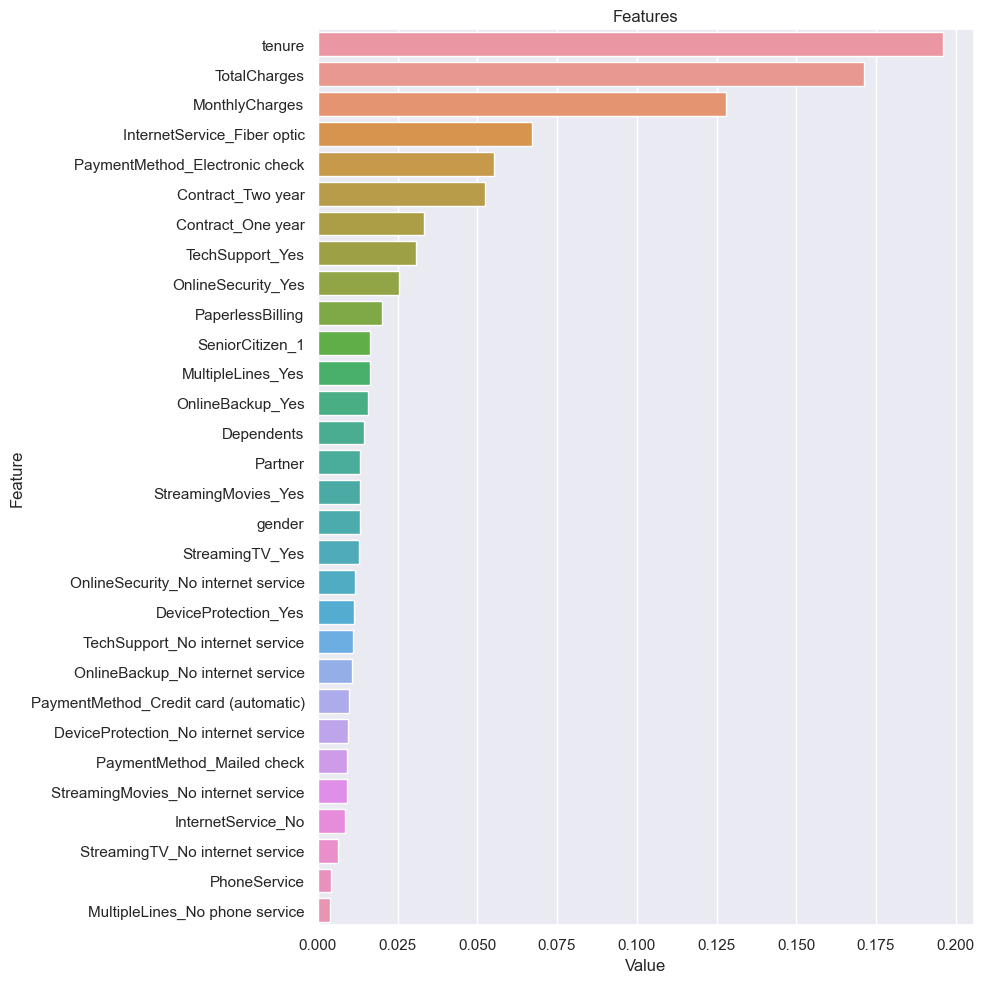

In [72]:
plot_importance(model_RF,X)

In [73]:
## Making prediction with the best model 

predicted_churn = model_LOG.predict(X)
df1['PredictedChurn'] = predicted_churn

In [74]:
# Create a Dataframe showcasing probability of Churn of each customer
predictions_df=pd.DataFrame(data={"customerID":df["customerID"],"PredictedChurn":predicted_churn})
predictions_df.to_csv(path_or_buf="telcom_pred_df.csv", index=False, quoting=3, sep=';')
# predictions_df.to_csv(path="predictions_df.csv",index=False,quoting=3,sep=';')
predictions_df

,customerID,PredictedChurn
0,7590-VHVEG,1
1,5575-GNVDE,0
2,3668-QPYBK,0
3,7795-CFOCW,0
4,9237-HQITU,1
...,...,...
7027,6840-RESVB,0
7028,2234-XADUH,0
7029,4801-JZAZL,0
7030,8361-LTMKD,1


In [75]:
# ## Selecting Customers whose PredictedChurn is 1
# churn_class_1 = predictions_df[predictions_df['PredictedChurn']==1]
# churn_class_1

## Saving the Model 

In [76]:
pickle.dump(model_LOG,open('telcom_model_log.pkl','wb'))

Contact Details:

- WhatsApp : +2347065093865
- Email : davoazorji1@gmail.com